In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('pizza_sales.csv')

In [3]:
data.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.5,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


Null Value Handling

In [4]:
data.isnull().sum()

,0
pizza_id,0
order_id,0
pizza_name_id,0
quantity,0
order_date,0
order_time,0
unit_price,0
total_price,1
pizza_size,1
pizza_category,1


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19484 entries, 0 to 19483
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   pizza_id           19484 non-null  int64         
 1   order_id           19484 non-null  int64         
 2   pizza_name_id      19484 non-null  object        
 3   quantity           19484 non-null  int64         
 4   order_date         19484 non-null  datetime64[ns]
 5   order_time         19484 non-null  object        
 6   unit_price         19484 non-null  object        
 7   total_price        19483 non-null  float64       
 8   pizza_size         19483 non-null  object        
 9   pizza_category     19483 non-null  object        
 10  pizza_ingredients  19482 non-null  object        
 11  pizza_name         19482 non-null  object        
 12  day_name           19484 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(8)
memory 

In [6]:
data['order_date'] = data['order_date'].astype('datetime64[ns]')

In [7]:
data['day_name']=data['order_date'].dt.day_name()

In [15]:
data.drop(index=13001,inplace=True)

In [16]:
data['order_time'] = data['order_time'].astype('datetime64[ns]')

In [17]:
data.sample(5)

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,day_name
161,162,70,ital_veggie_s,1,2015-01-02,2024-10-05 11:38:51,12.75,12.75,S,Veggie,"Eggplant, Artichokes, Tomatoes, Zucchini, Red ...",The Italian Vegetables Pizza,Friday
5153,5154,2283,ckn_alfredo_m,1,2015-02-07,2024-10-05 19:34:04,16.75,16.75,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza,Saturday
7665,14148,6192,sicilian_l,1,2015-04-14,2024-10-05 19:08:41,20.25,20.25,L,Supreme,"Coarse Sicilian Salami, Tomatoes, Green Olives...",The Sicilian Pizza,Tuesday
6632,13115,5746,mexicana_l,1,2015-04-07,2024-10-05 12:38:50,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,Tuesday
15684,9215,4036,southw_ckn_l,1,2015-03-09,2024-10-05 17:56:04,20.75,20.75,L,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja...",The Southwest Chicken Pizza,Monday


In [20]:
data['pizza_ingredients'] = data['pizza_ingredients'].astype(str).apply([lambda x:x.split(',')])

In [21]:
data.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,day_name
0,1,1,hawaiian_m,1,2015-01-01,2024-10-05 11:38:36,13.25,13.25,M,Classic,"[Sliced Ham, Pineapple, Mozzarella Cheese]",The Hawaiian Pizza,Thursday
1,2,2,classic_dlx_m,1,2015-01-01,2024-10-05 11:57:40,16,16.00,M,Classic,"[Pepperoni, Mushrooms, Red Onions, Red Pepp...",The Classic Deluxe Pizza,Thursday
2,3,2,five_cheese_l,1,2015-01-01,2024-10-05 11:57:40,18.5,18.50,L,Veggie,"[Mozzarella Cheese, Provolone Cheese, Smoked...",The Five Cheese Pizza,Thursday
3,4,2,ital_supr_l,1,2015-01-01,2024-10-05 11:57:40,20.75,20.75,L,Supreme,"[Calabrese Salami, Capocollo, Tomatoes, Red...",The Italian Supreme Pizza,Thursday
4,5,2,mexicana_m,1,2015-01-01,2024-10-05 11:57:40,16,16.00,M,Veggie,"[Tomatoes, Red Peppers, Jalapeno Peppers, R...",The Mexicana Pizza,Thursday


In [22]:
data['pizza_ingredients'].apply(lambda x:len(x)).max()

8

In [23]:
d=[]
for i in data['pizza_ingredients']:
  for j in i:
    d.append(j)

In [24]:
da =pd.DataFrame(d)

In [25]:
db = da.value_counts()

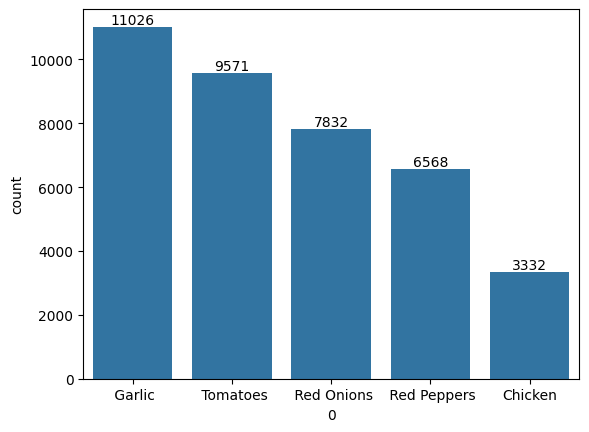

In [26]:
ax = sns.barplot(x=db.index.get_level_values(0)[0:5],y=db[0:5])
for container in ax.containers:
    ax.bar_label(container)

Its Showing regularly most used items

In [28]:
data.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,day_name
0,1,1,hawaiian_m,1,2015-01-01,2024-10-05 11:38:36,13.25,13.25,M,Classic,"[Sliced Ham, Pineapple, Mozzarella Cheese]",The Hawaiian Pizza,Thursday
1,2,2,classic_dlx_m,1,2015-01-01,2024-10-05 11:57:40,16,16.00,M,Classic,"[Pepperoni, Mushrooms, Red Onions, Red Pepp...",The Classic Deluxe Pizza,Thursday
2,3,2,five_cheese_l,1,2015-01-01,2024-10-05 11:57:40,18.5,18.50,L,Veggie,"[Mozzarella Cheese, Provolone Cheese, Smoked...",The Five Cheese Pizza,Thursday
3,4,2,ital_supr_l,1,2015-01-01,2024-10-05 11:57:40,20.75,20.75,L,Supreme,"[Calabrese Salami, Capocollo, Tomatoes, Red...",The Italian Supreme Pizza,Thursday
4,5,2,mexicana_m,1,2015-01-01,2024-10-05 11:57:40,16,16.00,M,Veggie,"[Tomatoes, Red Peppers, Jalapeno Peppers, R...",The Mexicana Pizza,Thursday


<ipython-input-29-34aaf21be508>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['total_price'])


<Axes: xlabel='total_price', ylabel='Density'>

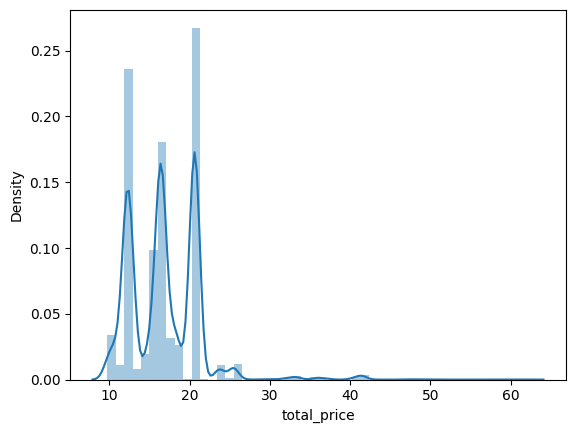

In [29]:
sns.distplot(data['total_price'])

its showing density of price at 12,15,21 price point we have high no of orders

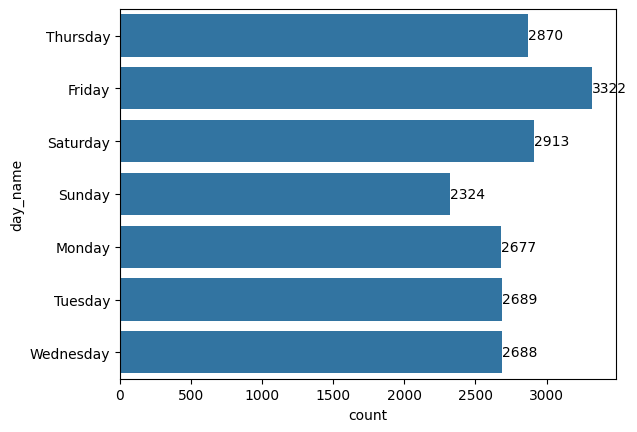

In [30]:
ax = sns.countplot(data['day_name'])
for i in ax.containers:
  ax.bar_label(i)

Total order we got on diffrent days

In [ ]:
On the

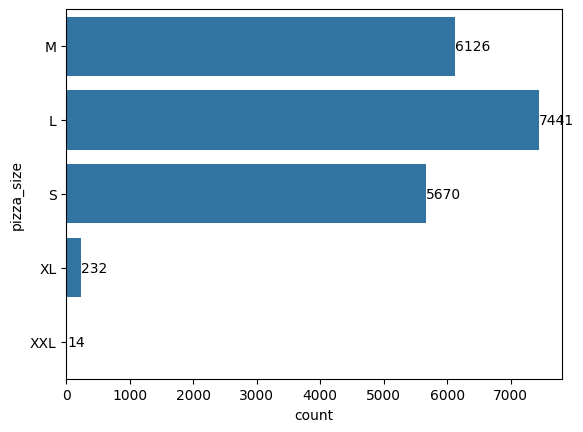

In [31]:
ax = sns.countplot(data['pizza_size'])
for i in ax.containers:
  ax.bar_label(i)

In [32]:
data.head(2)

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,day_name
0,1,1,hawaiian_m,1,2015-01-01,2024-10-05 11:38:36,13.25,13.25,M,Classic,"[Sliced Ham, Pineapple, Mozzarella Cheese]",The Hawaiian Pizza,Thursday
1,2,2,classic_dlx_m,1,2015-01-01,2024-10-05 11:57:40,16,16.00,M,Classic,"[Pepperoni, Mushrooms, Red Onions, Red Pepp...",The Classic Deluxe Pizza,Thursday


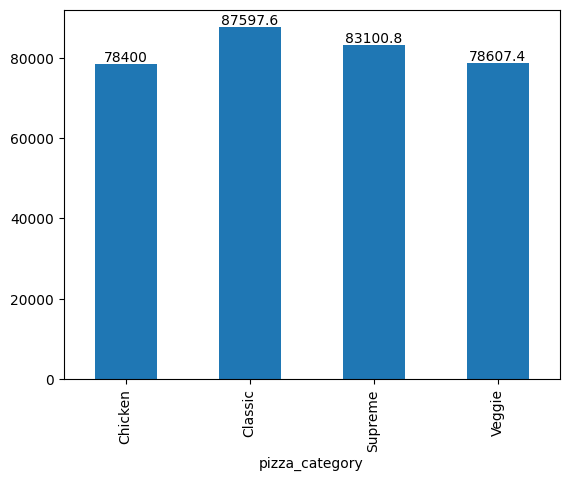

In [33]:
ax = data['total_price'].groupby(data['pizza_category']).sum().plot(kind='bar')
for i in ax.containers:
  ax.bar_label(i)

Total orders we got on diffrent pizza_category

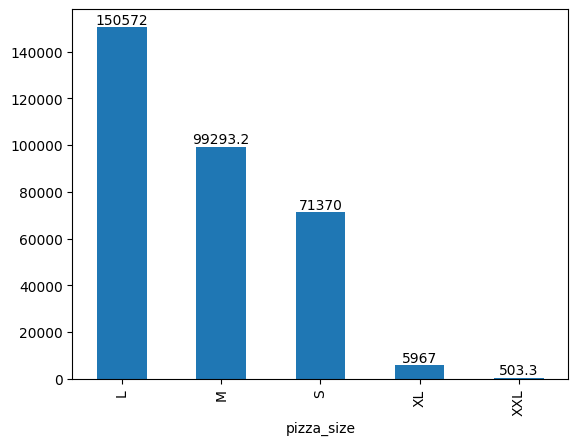

In [34]:
ax = data['total_price'].groupby(data['pizza_size']).sum().plot(kind='bar')
for i in ax.containers:
  ax.bar_label(i)

revenue by pizza size

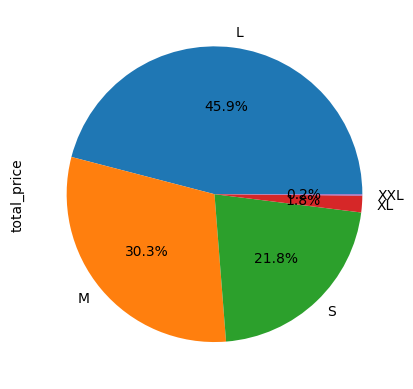

In [35]:
ax = data['total_price'].groupby(data['pizza_size']).sum().plot(kind='pie',autopct='%1.1f%%')

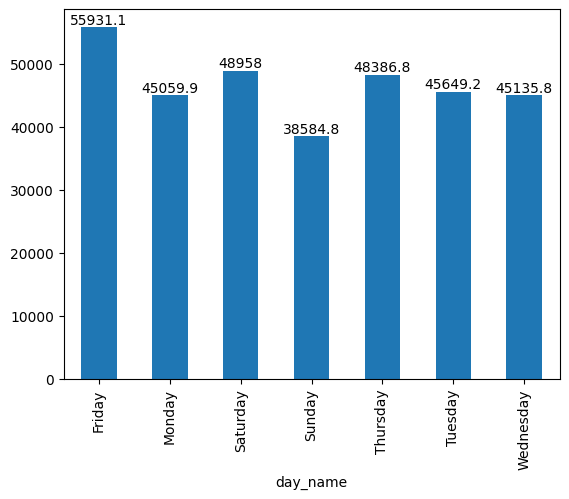

In [36]:
ax = data['total_price'].groupby(data['day_name']).sum().plot(kind='bar')
for i in ax.containers:
  ax.bar_label(i)

revenue by day

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 [Text(0, 0, 'The Barbecue Chicken Pizza'),
  Text(1, 0, 'The Big Meat Pizza'),
  Text(2, 0, 'The Brie Carre Pizza'),
  Text(3, 0, 'The Calabrese Pizza'),
  Text(4, 0, 'The California Chicken Pizza'),
  Text(5, 0, 'The Chicken Alfredo Pizza'),
  Text(6, 0, 'The Chicken Pesto Pizza'),
  Text(7, 0, 'The Classic Deluxe Pizza'),
  Text(8, 0, 'The Five Cheese Pizza'),
  Text(9, 0, 'The Four Cheese Pizza'),
  Text(10, 0, 'The Greek Pizza'),
  Text(11, 0, 'The Green Garden Pizza'),
  Text(12, 0, 'The Hawaiian Pizza'),
  Text(13, 0, 'The Italian Capocollo Pizza'),
  Text(14, 0, 'The Italian Supreme Pizza'),
  Text(15, 0, 'The Italian Vegetables Pizza'),
  Text(16, 0, 'The Mediterranean Pizza'),
  Text(17, 0, 'The Mexicana Pizza'),
  Text(18, 0, 'The Napolitana Pizza'),
  Text(19, 0, 'The Pepper Salami Pizza'),
  Text(20, 0, 'The Pepperoni Pizza'),
  

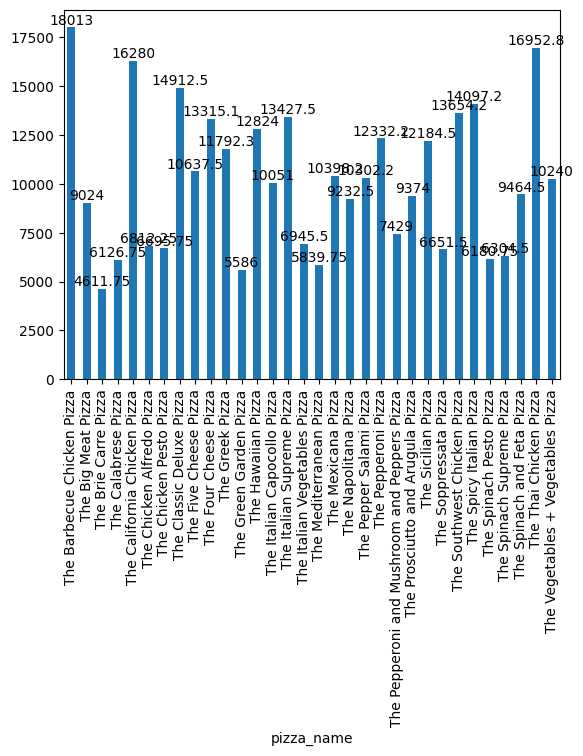

In [37]:
ax = data['total_price'].groupby(data['pizza_name']).sum().plot(kind='bar')
for i in ax.containers:
  ax.bar_label(i)
plt.xticks(rotation=90)

revenue by diffrent pizza

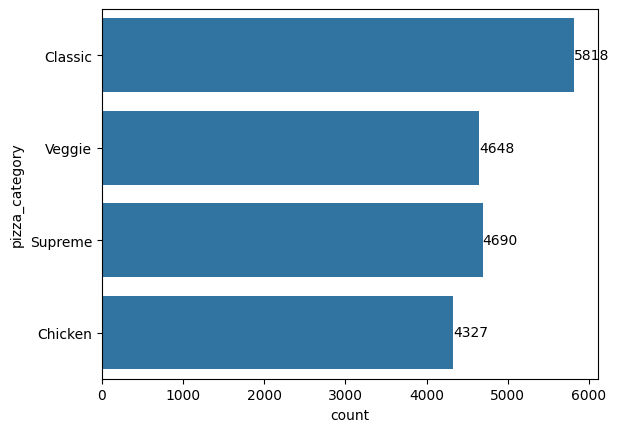

In [38]:
ax = sns.countplot(data['pizza_category'])
for i in ax.containers:
  ax.bar_label(i)

In [39]:
data.head(2)

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,day_name
0,1,1,hawaiian_m,1,2015-01-01,2024-10-05 11:38:36,13.25,13.25,M,Classic,"[Sliced Ham, Pineapple, Mozzarella Cheese]",The Hawaiian Pizza,Thursday
1,2,2,classic_dlx_m,1,2015-01-01,2024-10-05 11:57:40,16,16.00,M,Classic,"[Pepperoni, Mushrooms, Red Onions, Red Pepp...",The Classic Deluxe Pizza,Thursday


In [41]:
data['hour'] = data['order_time'].dt.hour

In [44]:
type(data['hour'])

pandas.core.series.Series

In [60]:
data['session'] = data['hour'].astype(int).to_frame().apply(pd.cut, bins=[0,6,12,16,21,24],labels=['earlymorning','morning','afternoon','evening','night'], axis=0)

In [61]:
data.head(2)

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,day_name,hour,session
0,1,1,hawaiian_m,1,2015-01-01,2024-10-05 11:38:36,13.25,13.25,M,Classic,"[Sliced Ham, Pineapple, Mozzarella Cheese]",The Hawaiian Pizza,Thursday,11,morning
1,2,2,classic_dlx_m,1,2015-01-01,2024-10-05 11:57:40,16,16.00,M,Classic,"[Pepperoni, Mushrooms, Red Onions, Red Pepp...",The Classic Deluxe Pizza,Thursday,11,morning


In [62]:
data['session'].value_counts()

,count
session,
evening,8450
afternoon,6792
morning,3721
night,520
earlymorning,0


In [63]:
data['session'].isnull().sum()

0

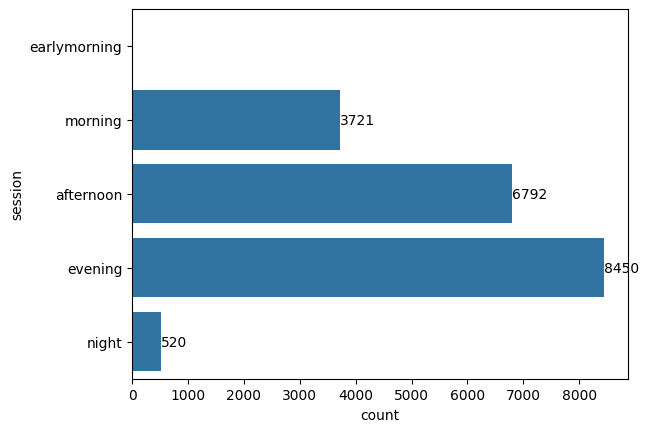

In [66]:
ax = sns.countplot(data['session'])
for i in ax.containers:
  ax.bar_label(i)

Orders by diffrent day sessions



---



---



Advanced report will done using BI Tools